In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

$\textbf{Testing With Commands}$ 

+ ```export NUMBA_NUM_THREADS=4```

+ ```python lebwohl_lasher_p_numba.py 500 150 0.5 0```

$\textbf{1. Ensure Correct Plots Are Produced}$

In [2]:
def plot_data(data):
    """
    Plots energy and order parameter against Monte Carlo step.

    Parameters
    ----------
    data : pd.DataFrame
        The data from the Lebwohl-Lasher simulation.
    """

    # Plot energy and order parameter against Monte Carlo step.
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(data.index, data["Energy"])
    ax[1].plot(data.index, data["Order"])

    ax[0].set_title("Reduced Temperature = 0.5")
    ax[0].set_xlabel("Monte Carlo Step")
    ax[0].set_ylabel("Reduced Energy")

    ax[1].set_title("Reduced Temperature = 0.5")
    ax[1].set_xlabel("Monte Carlo Step")
    ax[1].set_ylabel("Order Parameter")

    fig.tight_layout()
    plt.show()

$\textbf{1.1 Base Version}$

+ ```lebwohl_lasher_p_numba.py Version: Commit - 5dee8d63d36767e718de2c402ad8cb3a2b95d628```

+ $\text{This version is the same as the serial numba script from commit }$ ```03950205aab8da2c512b7bc9190e10f5e951e6da``` $\text{.}$

In [3]:
# Read in the output data.
data_001 = pd.DataFrame(np.loadtxt("output_logs/output_normal_5dee8d63d36767e718de2c402ad8cb3a2b95d628.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -21953.2 |  0.2523 |
|     1 |  0.6791 | -32751.1 |  0.2515 |
|     2 |  0.6324 | -39990.1 |  0.2549 |
|     3 |  0.5899 | -45280.6 |  0.257  |
|     4 |  0.5627 | -49131.8 |  0.2572 |


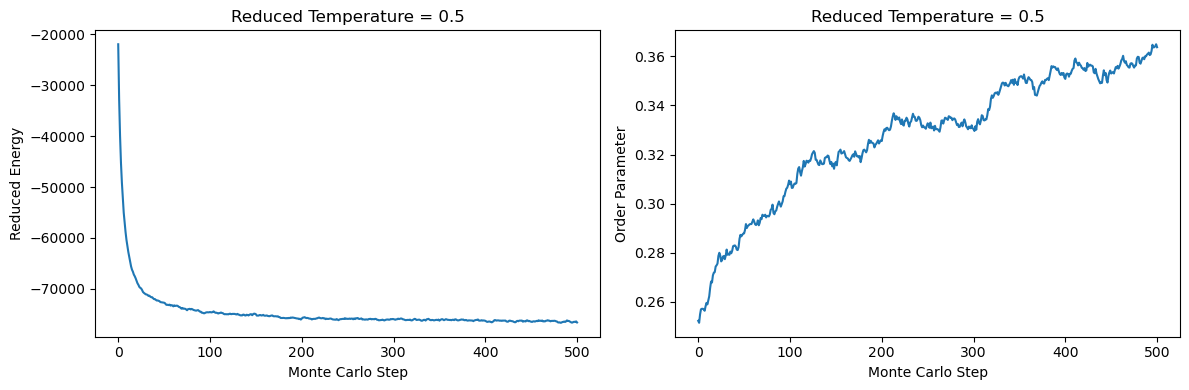

In [4]:
# Plot the output data.
plot_data(data_001)

$\textbf{1.2 Parallelised Function:}$ ```total_energy```

+ ```lebwohl_lasher_p_numba.py Version: Commit - 132c87998c0475ee9b0f883cc3a9b2f2febd4c5d```

In [5]:
# Read in the output data.
data_002 = pd.DataFrame(np.loadtxt("output_logs/output_normal_132c87998c0475ee9b0f883cc3a9b2f2febd4c5d.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_002.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -22830.8 |  0.2594 |
|     1 |  0.6765 | -33708.6 |  0.2618 |
|     2 |  0.6175 | -40816.5 |  0.265  |
|     3 |  0.5847 | -45795.4 |  0.2681 |
|     4 |  0.5525 | -49592.9 |  0.2682 |


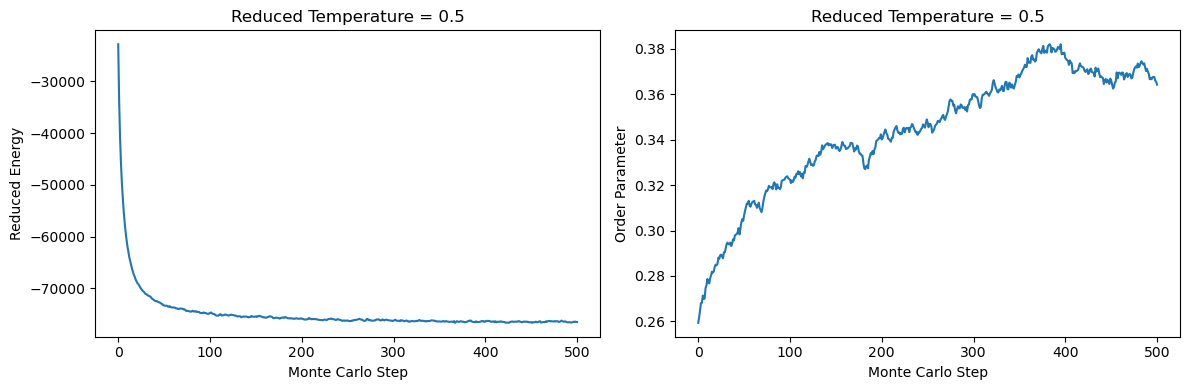

In [6]:
# Plot the output data.
plot_data(data_002)

$\textbf{1.3 Parallelised Function:}$ ```calculate_order```

+ ```lebwohl_lasher_p_numba.py Version: Commit - 61aed6de3778d5294e2379af48a5c17bed674f36```

In [7]:
# Read in the output data.
data_003 = pd.DataFrame(np.loadtxt("output_logs/output_normal_61aed6de3778d5294e2379af48a5c17bed674f36.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_003.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -22449.7 |  0.2518 |
|     1 |  0.6794 | -33333.1 |  0.254  |
|     2 |  0.6244 | -40626.1 |  0.2542 |
|     3 |  0.5866 | -45734.5 |  0.2553 |
|     4 |  0.5632 | -49661.6 |  0.2516 |


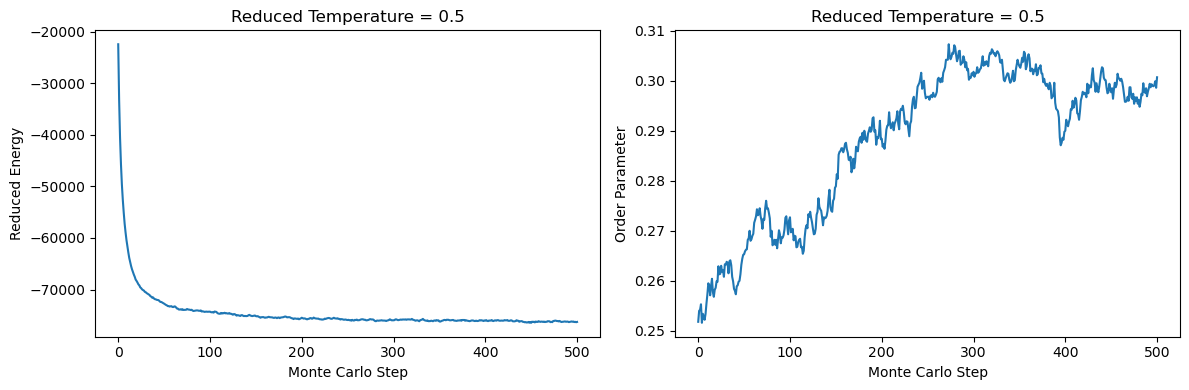

In [8]:
# Plot the output data.
plot_data(data_003)

$\textbf{1.4 Parallelised Function:}$ ```monte_carlo_step```

+ ```lebwohl_lasher_p_numba.py Version: Commit - 0716b022bc943f2c063dd2c2d031058bcc2bfce7```

In [9]:
# Read in the output data.
data_004 = pd.DataFrame(np.loadtxt("output_logs/output_normal_0716b022bc943f2c063dd2c2d031058bcc2bfce7.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_004.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -22273.2 |  0.2531 |
|     1 |  0.6965 | -34758.5 |  0.2505 |
|     2 |  0.625  | -42236.4 |  0.2545 |
|     3 |  0.5904 | -47739.7 |  0.2545 |
|     4 |  0.5485 | -51887.1 |  0.2555 |


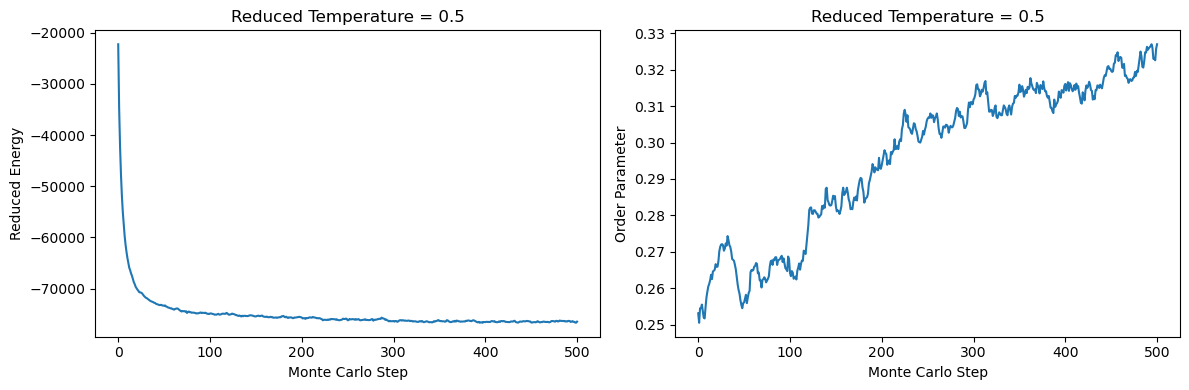

In [10]:
# Plot the output data.
plot_data(data_004)

$\textbf{2. Time Specific Functions}$

In [11]:
# Import the script.
import lebwohl_lasher_p_numba

In [12]:
# Generate a lattice.
lattice_length = 150
lattice = lebwohl_lasher_p_numba.init_lattice(lattice_length)

# Generate two lattice positions to time the "cell_energy" function.
x_pos, y_pos = np.random.randint(0, high=lattice_length, size=2)

$\textbf{2.1 Base Version}$

+ ```lebwohl_lasher_p_numba.py Version: Commit - 5dee8d63d36767e718de2c402ad8cb3a2b95d628```

+ $\text{This version is the same as the serial numba script from commit }$ ```03950205aab8da2c512b7bc9190e10f5e951e6da``` $\text{.}$

In [11]:
# # Time the "cell_energy" function.
# %timeit lebwohl_lasher_p_numba.cell_energy(lattice, lattice_length, x_pos, y_pos)

441 ns ± 30.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [12]:
# # Time the "total_energy" function.
# %timeit lebwohl_lasher_p_numba.total_energy(lattice, lattice_length)

2.31 ms ± 30 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
# # Time the "calculate_order" function.
# %timeit lebwohl_lasher_p_numba.calculate_order(lattice, lattice_length)

1.04 ms ± 13 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
# # Time the "monte_carlo_step" function.
# %timeit lebwohl_lasher_p_numba.monte_carlo_step(lattice, lattice_length, temperature=0.5)

6.51 ms ± 122 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


$\textbf{2.2 Parallelised Function:}$ ```total_energy```

+ ```lebwohl_lasher_p_numba.py Version: Commit - 132c87998c0475ee9b0f883cc3a9b2f2febd4c5d```

In [10]:
# # Time the "total_energy" function.
# %timeit lebwohl_lasher_p_numba.total_energy(lattice, lattice_length)

517 μs ± 72.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


$\textbf{2.3 Parallelised Function:}$ ```calculate_order```

+ ```lebwohl_lasher_p_numba.py Version: Commit - 61aed6de3778d5294e2379af48a5c17bed674f36```

In [ ]:
# # Time the "calculate_order" function.
# %timeit lebwohl_lasher_p_numba.calculate_order(lattice, lattice_length)

344 μs ± 54.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


$\textbf{2.4 Parallelised Function:}$ ```monte_carlo_step```

+ ```lebwohl_lasher_p_numba.py Version: Commit - 0716b022bc943f2c063dd2c2d031058bcc2bfce7```

In [16]:
# Time the "monte_carlo_step" function.
%timeit lebwohl_lasher_p_numba.monte_carlo_step(lattice, lattice_length, temperature=0.5)

1.44 ms ± 129 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
